# Imports

In [1]:
import cv2 as cv
import os
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
!pip list

Package               Version
--------------------- -----------
appnope               0.1.3
argon2-cffi           21.3.0
argon2-cffi-bindings  21.2.0
asttokens             2.0.5
attrs                 21.4.0
backcall              0.2.0
beautifulsoup4        4.11.1
bleach                5.0.1
caer                  2.0.8
cffi                  1.15.1
cycler                0.11.0
debugpy               1.6.2
decorator             5.1.1
defusedxml            0.7.1
entrypoints           0.4
executing             0.9.0
fastjsonschema        2.16.1
fonttools             4.34.4
ipykernel             6.15.1
ipython               8.4.0
ipython-genutils      0.2.0
jedi                  0.18.1
Jinja2                3.1.2
jsonschema            4.7.2
jupyter-client        7.3.4
jupyter-core          4.11.1
jupyterlab-pygments   0.2.2
kiwisolver            1.4.4
MarkupSafe            2.1.1
matplotlib            3.5.2
matplotlib-inline     0.1.3
mistune               0.8.4
mypy                  0.971
myp

# Setting up a Capture

In [2]:
# setting up the video path
vid_path = os.path.join('data', 'videos', 'dog.mp4')
vid_path

'data/videos/dog.mp4'

In [4]:
# setup capture to video
cap = cv.VideoCapture(vid_path)
# basically sets up a connection to our video

In [5]:
# grabbing a frame
ret, frame0 = cap.read() # (return_value, frame_matrix)

In [6]:
ret

True

In [7]:
frame0.dtype, frame0.shape
# this is a 720p video, because each frame consists of 720*1280 pixels

(dtype('uint8'), (720, 1280, 3))

In [8]:
# we can grab the second frame by invoking 'read' method again
ret, frame1 = cap.read()

In [9]:
frame1.dtype, frame1.shape

(dtype('uint8'), (720, 1280, 3))

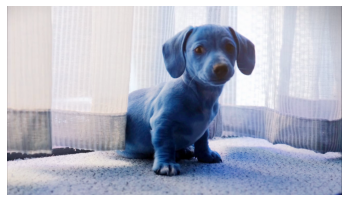

In [10]:
# Rendering the frame (raw)
plt.imshow(frame0)
plt.axis(False)
plt.show()

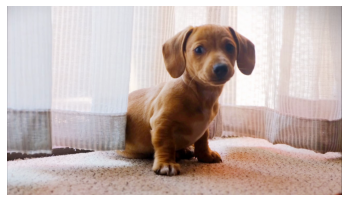

In [11]:
# Rendering the frames (with color channel conversions)
frame0_new = cv.cvtColor(frame0, cv.COLOR_BGR2RGB)
plt.imshow(frame0_new)
plt.axis(False)
plt.show()

## Releasing a Capture

Since, python still has a direct connection with the video file, so it is locked up. So, if we want to do anything with the video on our disk, we might run into some error. So, we need to release the capture.

In [12]:
# releasing a capture
cap.release()

After releasing, we won't be able to read the captures again from `cap`.

In [13]:
cap.read()
# this is because we don't have a capture set up anymore

(False, None)

# Capture Properties

In [10]:
# let's set up a capture again, since we released it in the last cell
print(vid_path)
cap = cv.VideoCapture(vid_path)

data/videos/dog.mp4


In [11]:
# Height
cap.get(cv.CAP_PROP_FRAME_HEIGHT)

720.0

In [12]:
# Width
cap.get(cv.CAP_PROP_FRAME_WIDTH)

1280.0

In [13]:
# Count: No. of frames
cap.get(cv.CAP_PROP_FRAME_COUNT)

336.0

In [14]:
# fps
cap.get(cv.CAP_PROP_FPS)
# fps = count/total_runtime

29.97002997002997

In [15]:
# this is the total video runtime
336/29.97

11.21121121121121

There are many other capture properties to explore!

In [16]:
cap.release()

After releasing the capture, every property will be returned as 0.

# Working with Video Captures

In [3]:
# setup/establish the capture
print(vid_path)
cap = cv.VideoCapture(vid_path)

data/videos/dog.mp4


In [4]:
frame_count = int(cap.get(cv.CAP_PROP_FRAME_COUNT))
frame_count

336

In [5]:
# Loop through each frame
for frame_idx in range(frame_count):
    # incrementally read each frame
    ret, frame = cap.read()

    # show frames
    cv.imshow("Video Player", frame)

    # exit condition / breaking out of the loop
    k = cv.waitKey(25) # this checks whether or not we are hitting any key and accepts the stroke into the variable 'k'
    # keep this 25ms for smooth playback
    if k == ord('q'): # if we press 'q', we will exit (break out of the loop)
        break

# Releasing the capture
cap.release()

# Closing all the windows
cv.destroyAllWindows()
cv.waitKey(1)

-1

## Transforming the Video Capture

In [50]:
# We will transform the frames of this video into a grayscale images and show this into a video window as a grayscale video

cap = cv.VideoCapture(vid_path)
frame_count = int(cap.get(cv.CAP_PROP_FRAME_COUNT))

# Loop through each frame
for frame_idx in range(frame_count):
    # incrementally read each frame
    ret, frame = cap.read()

    # converting this frame to grayscale
    frame_gs = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

    # show grayscale frame
    cv.imshow("GrayScale Video Player", frame_gs)

    # exit condition / breaking out of the loop
    k = cv.waitKey(25) # this checks whether or not we are hitting any key and accepts the stroke into the variable 'k'
    # keep this 25ms for smooth playback
    if k == ord('q'): # if we press 'q'
        break

# Releasing the capture
cap.release()

# Closing all the windows
cv.destroyAllWindows()
cv.waitKey(1)

-1

# Writing out Videos

In [11]:
vid_path

'data/videos/dog.mp4'

In [12]:
# we save the transformed video as a .avi file using fourcc: PIM1 codec
op_path = os.path.join('data', 'outputs', 'dog_gray.avi')
op_path

'data/outputs/dog_gray.avi'

In-order to save a video file, we actually sequentially write frames by frames using a 'video-writer' class, which will allow us to write out each and every frame as we are playing our video.

**Codecs:** Inorder to write a video we need to specify a codec and corresponding format of the output video file. We can do that by exploring `fourcc`.

For macos, using `avc1` codec with `.avi` format seems to work flawlessly.

In [13]:
# We will transform this into a grayscale video and save it at 'op_path'
# This will also simultaneously play the video (because we have invoked cv.imshow as well)

# Establish video capture
cap = cv.VideoCapture(vid_path)

# extracting video properties
height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
size = (width, height)
fps = int(cap.get(cv.CAP_PROP_FPS))
frame_count = int(cap.get(cv.CAP_PROP_FRAME_COUNT))
fourcc = cv.VideoWriter_fourcc('a','v','c','1')
# for macos Monterey: I don't the codec to use
# So, for video writing I will be running colab

# Setting up the video writer object
video_writer = cv.VideoWriter(op_path, fourcc, fps, size, isColor=False)
# To output grayscale video files (due to reduction in color channels), we need to pass isColor=False

# Loop through each frame
for frame_idx in range(frame_count):
    # incrementally read each frame
    ret, frame = cap.read()

    # converting this frame to grayscale
    frame_gs = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

    # show grayscale frame
    cv.imshow("Grayscale Video Player", frame_gs)

    # write out grayscale frame
    video_writer.write(frame_gs)

    # exit condition / breaking out of the loop
    k = cv.waitKey(25) # this checks whether or not we are hitting any key and accepts the stroke into the variable 'k'
    # keep this 25ms for smooth playback
    if k == ord('q'): # if we press 'q', we will exit (break out of the loop)
        break

# Releasing the capture
cap.release()

# Release video writer
video_writer.release()

# Closing all the windows
cv.destroyAllWindows()
cv.waitKey(1)

-1